In [35]:
import sys
from pathlib import Path

PROJECT_ROOT = Path(r"C:/Users/luigu/OneDrive/Escritorio/ProyectoML_YouTube")
sys.path.append(str(PROJECT_ROOT))

DATA_PATH = PROJECT_ROOT / "data" / "youtube_data.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.preprocessing import build_eda_frame
from src.evaluation import kpi_summary, pareto_shares
from src.visualization import hist, bar_series, scatter_xy, corr_heatmap

In [36]:
# Carga y vista rápida
df_raw = pd.read_csv(DATA_PATH, low_memory=False)
print("Shape:", df_raw.shape)
df_raw.head(5)

Shape: (17589, 17)


,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.0000,25.0000,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3
1,--cCAD-8Y_U,930,1195,1001,1280,720,30.0000,30.0000,h264,Gaming,https://www.youtube.com/watch?v=--cCAD-8Y_U,Pokemon Tower Defense Episodio 2,Espero que tenham gostado do video!,"Pokémon (Anime/Manga Franchise), Pokémon (Vide...",33,2,1
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.9800,23.9800,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17
3,-0DR7-voRCU,562,431,300,320,240,29.9700,0.0000,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.9800,23.9800,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0


In [37]:
df = build_eda_frame(df_raw)
df.head(5)

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments,duration_sec,title_len,title_words,title_has_question,title_has_exclaim,tag_count,engagement_rate,duration_bucket
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.0000,25.0000,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3,180.0000,37,5,False,False,47,0.0108,2-5m
1,--cCAD-8Y_U,930,1195,1001,1280,720,30.0000,30.0000,h264,Gaming,https://www.youtube.com/watch?v=--cCAD-8Y_U,Pokemon Tower Defense Episodio 2,Espero que tenham gostado do video!,"Pokémon (Anime/Manga Franchise), Pokémon (Vide...",33,2,1,930.0000,34,5,False,False,5,0.0909,10-20m
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.9800,23.9800,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17,233.0000,36,8,False,False,37,0.0115,2-5m
3,-0DR7-voRCU,562,431,300,320,240,29.9700,0.0000,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0,562.0000,26,3,False,False,6,0.0233,5-10m
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.9800,23.9800,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0,300.0000,76,14,False,False,55,0.0090,5-10m


In [44]:
df.duplicated().sum()

np.int64(0)

In [38]:
# Calidad de datos
summary = []
for c in df.columns:
    summary.append({
        "column": c,
        "dtype": str(df[c].dtype),
        "n_unique": df[c].nunique(dropna=True),
        "n_missing": int(df[c].isna().sum())
    })
dq = pd.DataFrame(summary).sort_values("n_missing", ascending=False)
dq.head(30)

,column,dtype,n_unique,n_missing
13,hashtags,object,15108,1576
12,description,object,12773,1112
23,engagement_rate,float64,5690,171
1,duration,int64,1320,0
4,height,int64,266,0
5,width,int64,172,0
2,bitrate,int64,3512,0
3,bitrate(video),int64,3444,0
0,video_id,object,17589,0
8,codec,object,4,0


In [39]:
# KPIs básicos (escala y contexto)
kpis = kpi_summary(df)
kpis

,valor
n_videos,"17,589.0000"
views_total,"1,212,613,456.0000"
views_median,152.0000
views_p90,"5,580.0000"
likes_median,1.0000
comments_median,0.0000


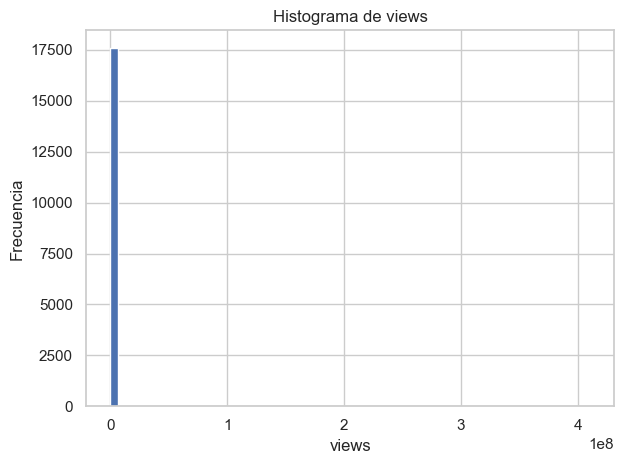

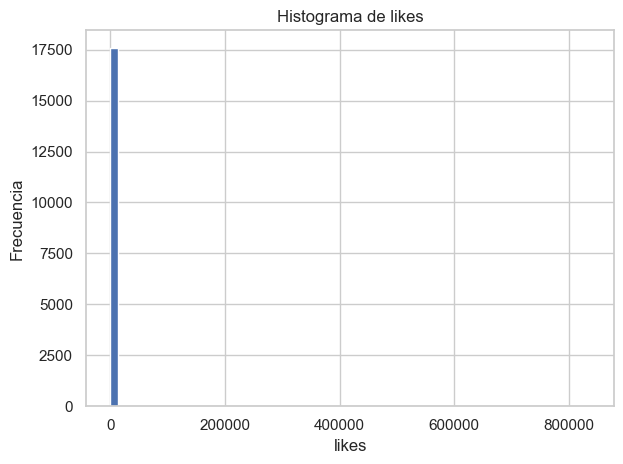

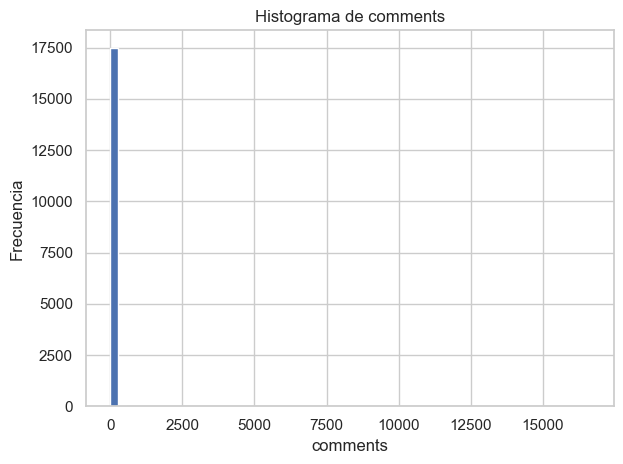

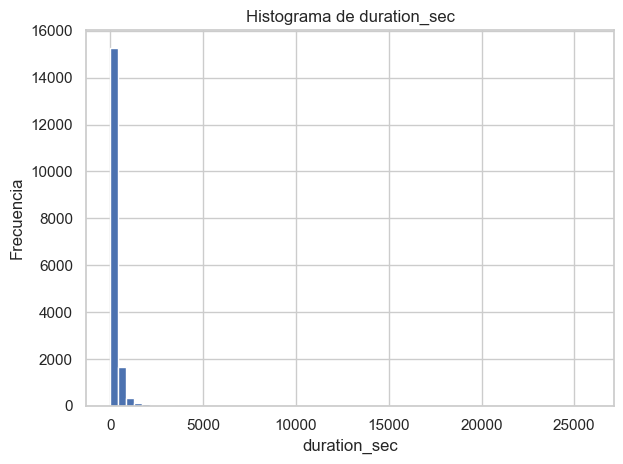

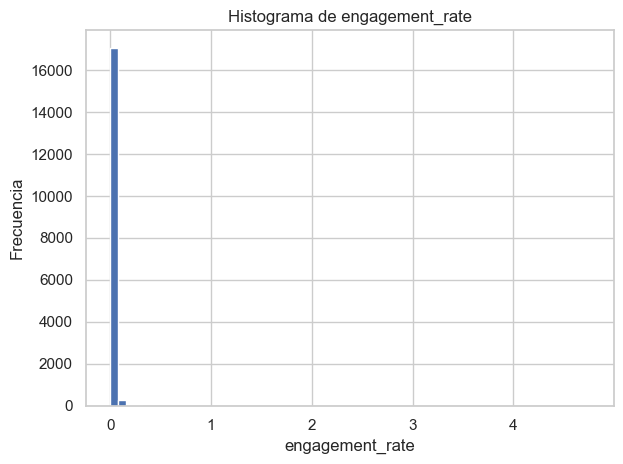

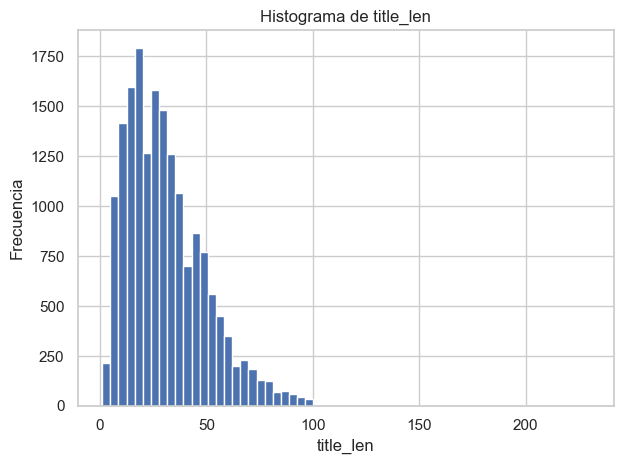

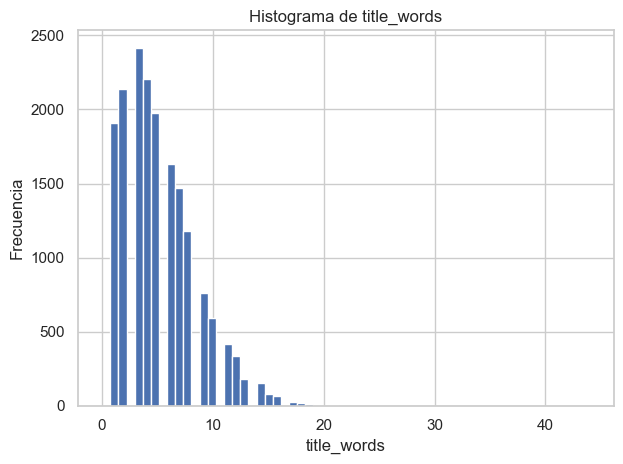

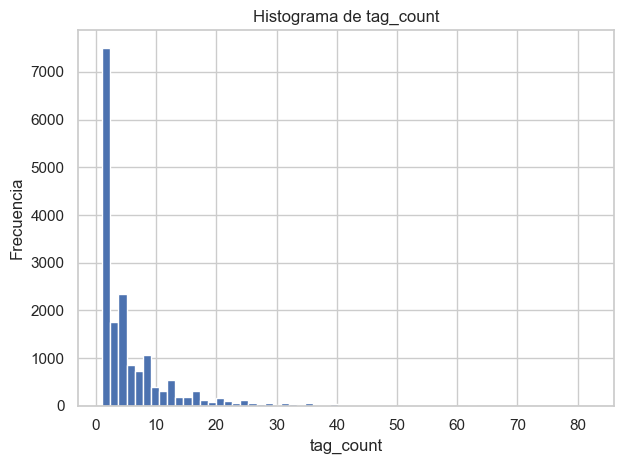

In [40]:
# Distribuciones claves
for col in ["views", "likes", "comments", "duration_sec", "engagement_rate",
            "title_len", "title_words", "tag_count"]:
    if col in df.columns:
        hist(df[col], f"Histograma de {col}", bins=60)
plt.show()

,median_views
duration_bucket,
5-10m,325.0000
20m+,277.0000
2-5m,230.0000
10-20m,217.5000
<2m,88.0000


,median_eng_rate
duration_bucket,
20m+,0.0068
10-20m,0.0050
5-10m,0.0041
2-5m,0.0037
<2m,0.0000


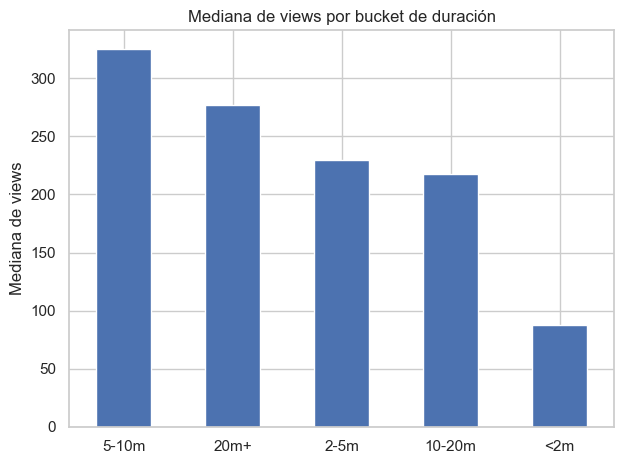

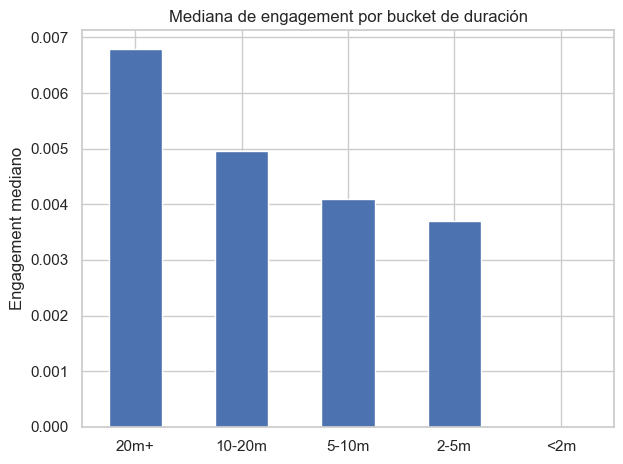

In [41]:
# Buckets de duración: mediana de views y engagement
if "duration_bucket" in df.columns and "views" in df.columns:
    dur_med_views = df.groupby("duration_bucket")["views"].median().sort_values(ascending=False)
    display(dur_med_views.to_frame("median_views"))
    bar_series(dur_med_views, "Mediana de views por bucket de duración", ylabel="Mediana de views")

if "duration_bucket" in df.columns and "engagement_rate" in df.columns:
    dur_med_er = df.groupby("duration_bucket")["engagement_rate"].median().sort_values(ascending=False)
    display(dur_med_er.to_frame("median_eng_rate"))
    bar_series(dur_med_er, "Mediana de engagement por bucket de duración", ylabel="Engagement mediano")

plt.show()

,median_views_by_question
title_has_question,
False,152.0000
True,176.0000


,median_views_by_exclaim
title_has_exclaim,
False,152.0000
True,153.0000


C:\Users\luigu\AppData\Local\Temp\ipykernel_24596\1225438078.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tag_med_views = df.groupby(tc)["views"].median()


,median_views_by_tag_bucket
tag_count,
0,NaN
1-3,82.0000
4-6,221.0000
7-10,319.0000
11+,596.0000


C:\Users\luigu\AppData\Local\Temp\ipykernel_24596\1225438078.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tag_med_er = df.groupby(tc)["engagement_rate"].median()


,median_eng_by_tag_bucket
tag_count,
0,NaN
1-3,0.0000
4-6,0.0025
7-10,0.0036
11+,0.0056


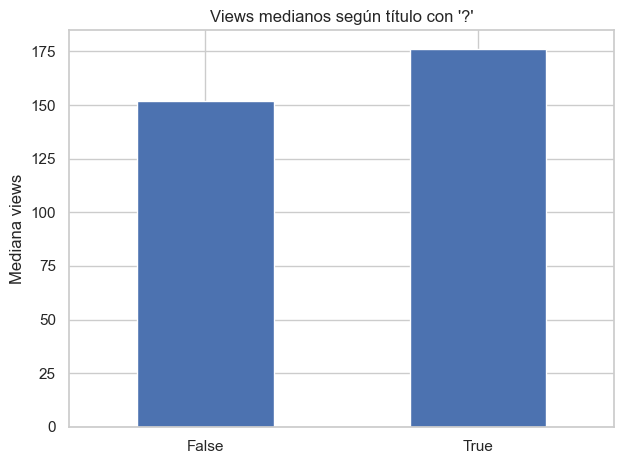

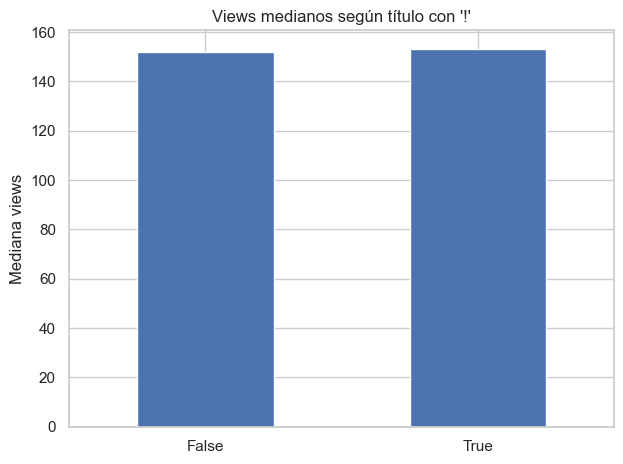

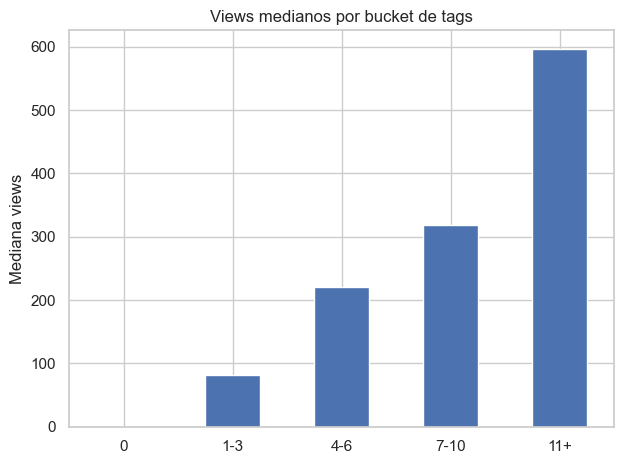

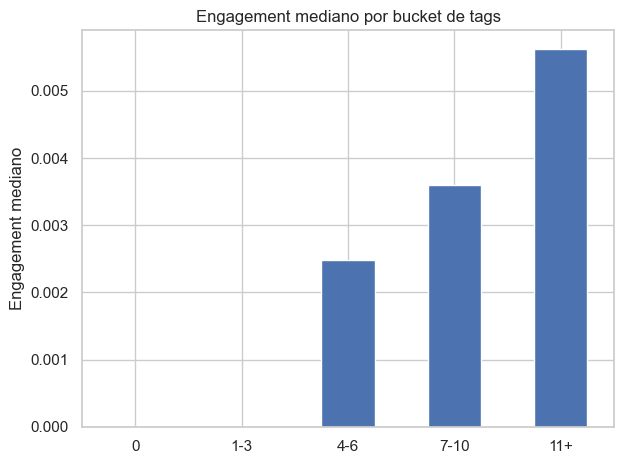

In [42]:
# Títulos y tags
if "views" in df.columns and "title_has_question" in df.columns:
    q_med = df.groupby("title_has_question")["views"].median()
    display(q_med.to_frame("median_views_by_question"))
    bar_series(q_med, "Views medianos según título con '?'", ylabel="Mediana views")

if "views" in df.columns and "title_has_exclaim" in df.columns:
    e_med = df.groupby("title_has_exclaim")["views"].median()
    display(e_med.to_frame("median_views_by_exclaim"))
    bar_series(e_med, "Views medianos según título con '!'", ylabel="Mediana views")

if "views" in df.columns and "tag_count" in df.columns:
    tc = pd.cut(df["tag_count"], bins=[-1,0,3,6,10,100], labels=["0","1-3","4-6","7-10","11+"], include_lowest=True)
    tag_med_views = df.groupby(tc)["views"].median()
    display(tag_med_views.to_frame("median_views_by_tag_bucket"))
    bar_series(tag_med_views, "Views medianos por bucket de tags", ylabel="Mediana views")

if "engagement_rate" in df.columns and "tag_count" in df.columns:
    tc = pd.cut(df["tag_count"], bins=[-1,0,3,6,10,100], labels=["0","1-3","4-6","7-10","11+"], include_lowest=True)
    tag_med_er = df.groupby(tc)["engagement_rate"].median()
    display(tag_med_er.to_frame("median_eng_by_tag_bucket"))
    bar_series(tag_med_er, "Engagement mediano por bucket de tags", ylabel="Engagement mediano")

plt.show()

,n_videos,med_views,avg_views,med_eng
category,,,,
People & Blogs,3946,67.0000,"6,344.4169",0.0000
Music,2966,391.5000,"124,192.1986",0.0051
Entertainment,2252,158.0000,"32,320.8011",0.0020
Gaming,1420,119.0000,"122,576.7268",0.0093
Sports,1230,192.0000,"8,643.6943",0.0007
Comedy,1176,106.0000,"30,404.0289",0.0008
Autos & Vehicles,798,169.5000,"23,199.0251",0.0003
Education,644,194.5000,"663,729.8602",0.0020
News & Politics,636,227.0000,"28,173.9638",0.0014


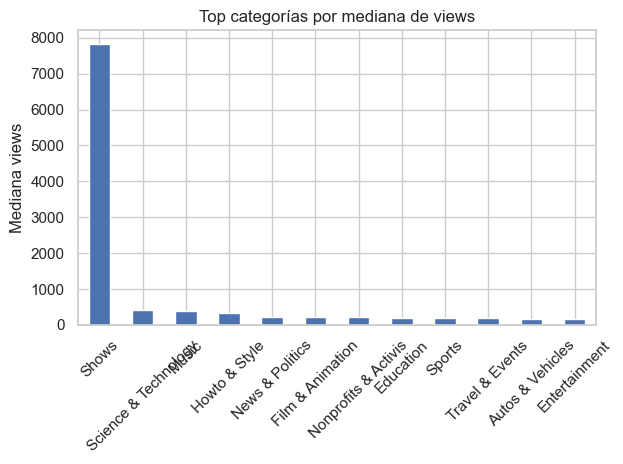

In [43]:
# Categorías: volumen y rendimiento
if "category" in df.columns and "views" in df.columns:
    agg_cat = df.groupby("category").agg(
        n_videos=("category", "count"),
        med_views=("views", "median"),
        avg_views=("views", "mean"),
        med_eng=("engagement_rate", "median"),
    ).sort_values("n_videos", ascending=False)
    display(agg_cat.head(15))

    top_med = agg_cat["med_views"].sort_values(ascending=False).head(12)
    bar_series(top_med, "Top categorías por mediana de views", ylabel="Mediana views", rotate=45)

plt.show()

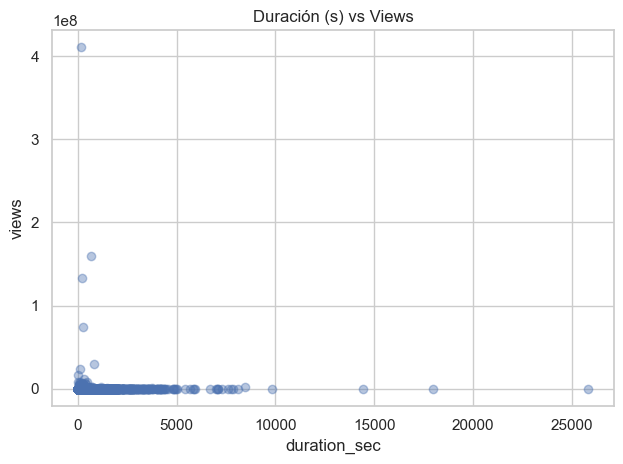

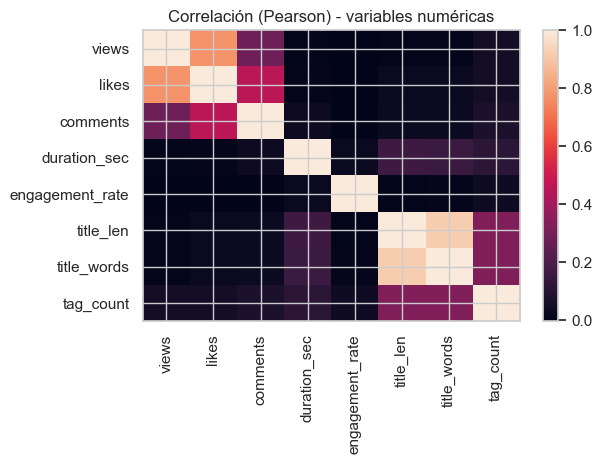

In [45]:
# Relaciones: scatter y correlaciones
if "duration_sec" in df.columns and "views" in df.columns:
    scatter_xy(df, "duration_sec", "views", "Duración (s) vs Views", alpha=0.4)

num_cols = [c for c in ["views","likes","comments","duration_sec","engagement_rate","title_len","title_words","tag_count"] if c in df.columns]
df_num = df[num_cols].apply(pd.to_numeric, errors="coerce")
if df_num.shape[1] >= 2:
    corr_heatmap(df_num, title="Correlación (Pearson) - variables numéricas")

plt.show()

In [ ]:
# Concentración tipo Pareto
if "views" in df.columns:
    shares = pareto_shares(df["views"])
    shares

In [ ]:
# Resumen rápido
from IPython.display import Markdown as md

lines = []
lines.append(f"- Filas: {df.shape[0]:,} | Columnas: {df.shape[1]}")
if "views" in df.columns:
    v = pd.to_numeric(df["views"], errors="coerce")
    lines.append(f"- Mediana views: {np.nanmedian(v):,.0f} | P90: {np.nanquantile(v, 0.90):,.0f}")
if "duration_bucket" in df.columns and "views" in df.columns:
    dmed = df.groupby("duration_bucket")["views"].median().sort_values(ascending=False).head(5)
    lines.append("- Buckets de duración con mayor mediana de views: " + ", ".join([f"{k}: {int(v)}" for k,v in dmed.items()]))
if "tag_count" in df.columns and "views" in df.columns:
    lines.append("- Más tags tienden a asociarse con mayor mediana de views (0→11+).")

md("\n".join(lines))

- Filas: 17,589 | Columnas: 25
- Mediana views: 152 | P90: 5,580
- Buckets de duración con mayor mediana de views: 5-10m: 325, 20m+: 277, 2-5m: 230, 10-20m: 217, <2m: 88
- Más tags tienden a asociarse con mayor mediana de views (0→11+).